In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [3]:
df = pd.read_csv('NCAA_data.csv')
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Above Avg,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Below Avg,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Below Avg,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,louisiana monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


#PREPROCESSING

In [4]:
y = df["class"]  


In [5]:
df.dtypes

player_id                           object
name                                object
class                               object
college                             object
assists                              int64
blocks                               int64
effective_field_goal_percentage    float64
field_goal_percentage              float64
free_throw_attempt_rate            float64
free_throw_percentage              float64
games_played                         int64
height                               int64
minutes_played                     float64
points                               int64
steals                               int64
three_point_percentage             float64
three_pointers                     float64
total_rebounds                       int64
true_shooting_percentage           float64
turnover_percentage                float64
turnovers                          float64
win_shares_per_40_minutes          float64
assists_per_40                     float64
blocks_per_

In [6]:
X = df.drop(["class","name", "college","player_id"], axis=1)
X.head()

,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,games_played,height,minutes_played,points,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,142,292,0.587,0.586,0.494,0.581,116,81,2042.0,1279,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,403,52,0.541,0.455,0.249,0.790,128,73,3260.0,2100,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,124,193,0.542,0.542,0.555,0.656,138,83,2184.0,863,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,479,10,0.486,0.416,0.257,0.822,108,70,2149.0,1650,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,147,42,0.507,0.428,0.357,0.769,55,80,1938.0,1062,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [7]:
#Split into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Model Training

In [10]:
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.998/0.280
k: 3, Train/Test Score: 0.634/0.313
k: 5, Train/Test Score: 0.571/0.280
k: 7, Train/Test Score: 0.543/0.308
k: 9, Train/Test Score: 0.495/0.327
k: 11, Train/Test Score: 0.484/0.341
k: 13, Train/Test Score: 0.462/0.379
k: 15, Train/Test Score: 0.465/0.332
k: 17, Train/Test Score: 0.474/0.360
k: 19, Train/Test Score: 0.452/0.393


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

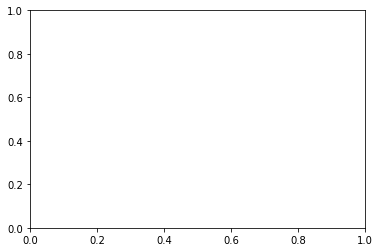

In [11]:
plt.plot(range(1, 20, 2), train_scores, marker='0')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K Neignbors")
plt.ylabel("Testing Accuracy Score")
plt.show()



In [12]:
#Model Accuracy

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.379


In [13]:
#Look at other models at this point
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1, 5, 10],
             'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.344, total= 7.3min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.391, total= 8.3min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.6min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.352, total= 8.9min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.352, total=14.5min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.449, total=19.3min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.344, total= 7.2min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.391, total=52.9min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.352, total=10.8min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.352, total=42.8min
[CV] C=1, gamma=0.001 ................................................
[CV] .

In [ ]:
#List the best parameters for this dataset
print(grid.best_params_)

In [ ]:
#List the best score
print(grid.best_score_)

In [1]:
#Make predictions with hypertuned model
predictions = grid.predict(X_test)

NameError: name 'grid' is not defined

In [ ]:
#Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names = target_names ))